In [859]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [860]:
# We start loading some of the libraries that we might use later
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import scipy.stats

# Exploratory Data Analysis

In [861]:
test_data_v2=pd.read_csv('ml_case_test_data_v2.csv')
test_hist=pd.read_csv('ml_case_test_hist_data.csv')
training=pd.read_csv('ml_case_training_data_v2.csv')
output=pd.read_csv('ml_case_training_output.csv')
full=pd.read_csv('full_dataset.csv',sep=';')

In [862]:
print(test_data_v2.shape)
test_data_v2.head()

(4016, 35)


,Unnamed: 0,id,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,isic_1l,isic_2l,zip
0,9,f5ce04411fcb8ea5fbdcc515d818ea01,NaN,lmkebamcaaclubfxadlmueccxoimlema,143112,0,0,2012-04-24,2016-04-24,NaN,...,19.28,19.28,1,1795.34,4,ldkssxwpmemidmecebumciepifcamkci,10.392,Q,87,31395
1,10,cb3f6adabceb7ea2d6042e85113d6675,NaN,NaN,12565,6157,571,2009-09-28,2016-09-28,NaN,...,8.98,8.98,3,77.27,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.392,G,47,31395
2,15,af0865bfba4e9bd4a60b5a45643109ba,NaN,foosdfpfkusacimwkcsosbicdxkicaua,5640,106717,0,2009-11-24,2016-11-24,NaN,...,21.78,21.78,2,82.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,M,72,50316
3,26,2623687b9b38dd32aabbefdd0e950f30,NaN,foosdfpfkusacimwkcsosbicdxkicaua,48864,0,3190,2012-01-04,2017-01-04,NaN,...,51.84,51.84,1,449.03,4,lxidpiddsbxsbosboudacockeimpuepw,34.641,F,41,15325
4,39,ea33a17335d0ef40b27c663dd568d210,NaN,NaN,13087,0,1043,2008-01-29,2016-01-29,NaN,...,34.44,34.44,1,146.00,8,ldkssxwpmemidmecebumciepifcamkci,17.240,C,25,20749


In [863]:
print(test_hist.shape)
test_hist.head()

(48236, 8)


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,3acc714fbd9b3ccaac3c412cf220e929,2015-01-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,2015-02-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,2015-03-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3,3acc714fbd9b3ccaac3c412cf220e929,2015-04-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
4,3acc714fbd9b3ccaac3c412cf220e929,2015-05-01,0.168185,0.084213,0.0,44.266930,0.0,0.0


In [864]:
print(training.shape)
training.head()

(16083, 35)


,Unnamed: 0,id,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,isic_1l,isic_2l,zip
0,0,48ada52261e7cf58715202705a0451c9,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,G,47,43877
1,1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,G,47,31395
2,2,23f9e0bddadb1d9c567b3c4576c8ac34,NaN,NaN,35446,0,4265,2009-10-26,2016-10-25,NaN,...,27.44,27.44,1,40.23,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,A,2,31395
3,3,0c14a4e90623d74951da665862147606,NaN,foosdfpfkusacimwkcsosbicdxkicaua,63442,0,10261,2012-05-15,2016-05-15,2012-05-15,...,17.22,17.22,1,168.94,4,lxidpiddsbxsbosboudacockeimpuepw,10.390,F,41,31395
4,4,f2c6ef2fa0b1a52d02872832279081c0,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,11354,0,992,2013-01-01,2017-01-01,NaN,...,0.00,0.00,1,156.32,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,L,68,31395


In [865]:
print(output.shape)
output.head()

(16096, 2)


,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


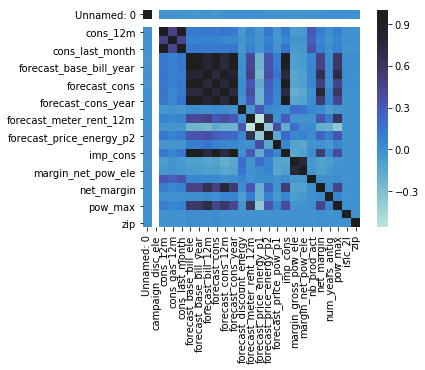

In [866]:
sns.heatmap(training.corr(),center=True,square=True)

In [867]:
training['campaign_disc_ele'].unique()

array([nan])

In [868]:
print(full.shape)
full.head()

(20099, 36)


,id,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,isic_1l,isic_2l,zip,churn,Churn_probability
0,48ada52261e7cf58715202705a0451c9,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,G,47,43877,0.0,0.0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,...,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,G,47,31395,1.0,1.0
2,23f9e0bddadb1d9c567b3c4576c8ac34,NaN,NaN,35446,0,4265,2009-10-26,2016-10-25,NaN,2009-10-26,...,1,40.23,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,A,2,31395,0.0,0.0
3,0c14a4e90623d74951da665862147606,NaN,foosdfpfkusacimwkcsosbicdxkicaua,63442,0,10261,2012-05-15,2016-05-15,2012-05-15,2012-05-15,...,1,168.94,4,lxidpiddsbxsbosboudacockeimpuepw,10.390,F,41,31395,0.0,0.0
4,f2c6ef2fa0b1a52d02872832279081c0,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,11354,0,992,2013-01-01,2017-01-01,NaN,2013-01-01,...,1,156.32,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,L,68,31395,0.0,0.0


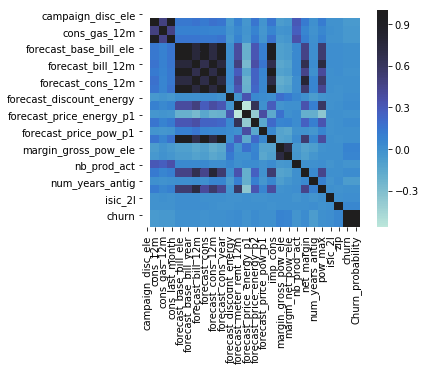

In [869]:
sns.heatmap(full.corr(),center=True,square=True)

In [870]:
correlation=full.corr()
correlation.sort_values(by='churn')

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,isic_2l,zip,churn,Churn_probability
num_years_antig,NaN,0.004497,-0.013291,0.001813,0.013914,0.013914,0.027831,0.002359,0.062750,0.064764,...,-0.078031,-0.031848,0.006884,0.035963,1.000000,0.083688,-0.018974,0.013824,-0.071515,-0.071515
cons_12m,NaN,1.000000,0.491418,0.927363,0.136303,0.136303,0.162994,0.131562,0.169948,0.148705,...,-0.066941,-0.045310,0.307299,0.129209,0.004497,0.108745,-0.004735,-0.002347,-0.051862,-0.051862
cons_last_month,NaN,0.927363,0.469557,1.000000,0.145301,0.145301,0.145732,0.143220,0.133626,0.159505,...,-0.056351,-0.037992,0.354386,0.103407,0.001813,0.092945,-0.010149,-0.004558,-0.046903,-0.046903
cons_gas_12m,NaN,0.491418,1.000000,0.469557,0.087278,0.087278,0.090273,0.075786,0.067824,0.065170,...,-0.022804,-0.013805,0.270177,0.065520,-0.013291,0.054788,0.002628,-0.003277,-0.040707,-0.040707
nb_prod_act,NaN,0.307299,0.270177,0.354386,0.039601,0.039601,0.040628,0.040788,0.016059,0.018714,...,-0.043018,-0.032315,1.000000,0.005088,0.006884,0.019412,-0.018475,0.001418,-0.022343,-0.022343
forecast_cons,NaN,0.131562,0.075786,0.143220,0.965047,0.965047,0.677617,1.000000,0.695480,0.980648,...,-0.110740,-0.080051,0.040788,0.459744,0.002359,0.402466,0.009897,0.014785,-0.004164,-0.004164
forecast_price_energy_p1,NaN,-0.036510,-0.024927,-0.026823,-0.203675,-0.203675,-0.259594,-0.139439,-0.216231,-0.202210,...,0.177533,0.009074,0.023245,-0.189652,-0.195577,-0.353401,0.002867,0.000376,-0.003604,-0.003604
forecast_base_bill_ele,NaN,0.136303,0.087278,0.145301,1.000000,1.000000,0.755829,0.965047,0.728622,0.966610,...,-0.094857,-0.063275,0.039601,0.469259,0.013914,0.542454,0.013932,0.015741,0.001614,0.001614
forecast_base_bill_year,NaN,0.136303,0.087278,0.145301,1.000000,1.000000,0.755829,0.965047,0.728622,0.966610,...,-0.094857,-0.063275,0.039601,0.469259,0.013914,0.542454,0.013932,0.015741,0.001614,0.001614
forecast_cons_year,NaN,0.148705,0.065170,0.159505,0.966610,0.966610,0.732996,0.980648,0.738146,1.000000,...,-0.139435,-0.108729,0.018714,0.544711,0.064764,0.434038,-0.001442,-0.003494,0.003091,0.003091


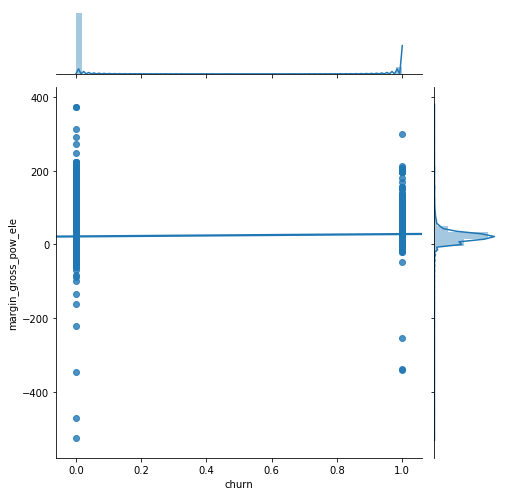

In [871]:
sns.jointplot(x="churn", y="margin_gross_pow_ele", data=full, kind = 'reg', size = 7)
plt.show()

In [872]:
full.date_modif_prod.nunique

<bound method IndexOpsMixin.nunique of 0        2012-11-07
1               NaN
2        2009-10-26
3        2012-05-15
4        2013-01-01
5        2015-08-04
6        2010-06-15
7        2015-07-10
8        2015-05-24
9        2009-08-21
10       2012-07-09
11       2010-09-20
12       2010-04-16
13       2010-03-30
14       2011-03-03
15       2009-07-15
16       2015-07-23
17       2005-04-19
18       2014-10-17
19       2015-02-05
20       2010-02-19
21       2013-04-19
22       2015-11-01
23       2010-04-08
24       2012-08-17
25       2010-02-08
26       2011-05-05
27       2015-12-15
28       2015-07-12
29       2009-09-01
            ...    
20069    2013-05-04
20070    2011-04-04
20071    2015-10-07
20072    2010-06-14
20073    2010-01-14
20074    2009-10-07
20075    2010-03-04
20076    2010-11-08
20077    2015-07-24
20078    2009-10-01
20079    2015-05-01
20080    2015-11-16
20081    2012-10-24
20082    2011-08-08
20083    2009-09-17
20084    2013-05-09
20085    2015-11-18
2

In [873]:
full.has_gas.unique()

array(['f', 't'], dtype=object)

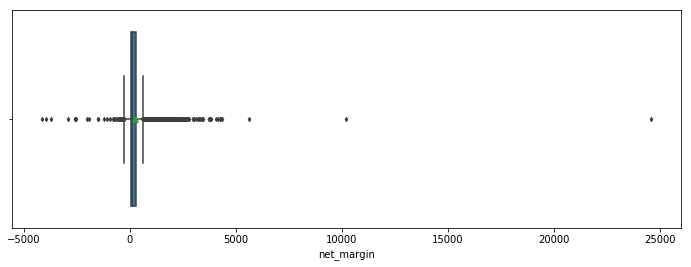

In [874]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'net_margin', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


In [875]:
scipy.stats.mstats.winsorize(full['net_margin'], limits=0.01,inplace=True)

masked_array(data=[1494.57,  678.99,   40.23, ...,  171.13,   65.06,
                    180.78],
             mask=False,
       fill_value=1e+20)

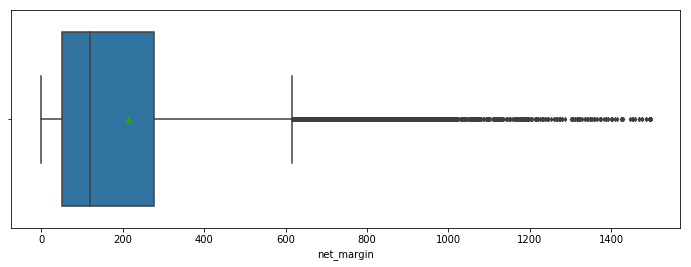

In [876]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'net_margin', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


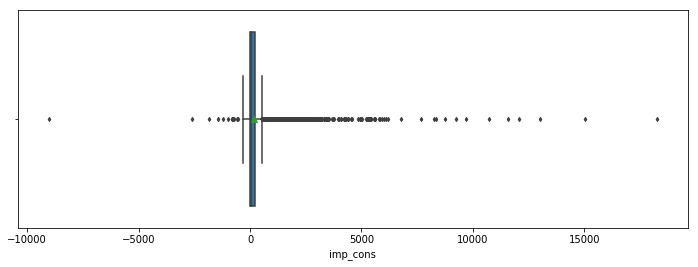

In [877]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'imp_cons', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


In [878]:
scipy.stats.mstats.winsorize(full['imp_cons'], limits=0.01,inplace=True)

masked_array(data=[831.8 ,   0.  , 276.82, ...,   0.  ,  56.34,   0.  ],
             mask=False,
       fill_value=1e+20)

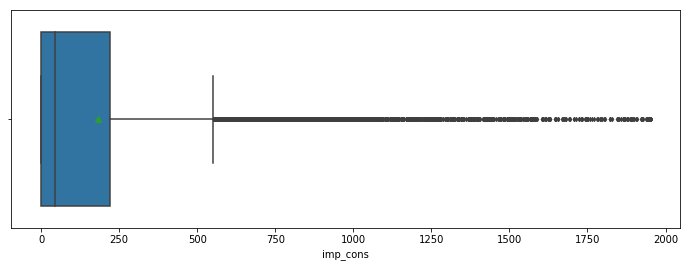

In [879]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'imp_cons', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


In [880]:
full.columns

Index(['id', 'campaign_disc_ele', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_first_activ',
       'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'isic_1l',
       'isic_2l', 'zip', 'churn', 'Churn_probability'],
      dtype='object')

In [881]:
full.cons_12m.unique()

array([309275,      0,  35446, ...,   6354,  11953,  15530])

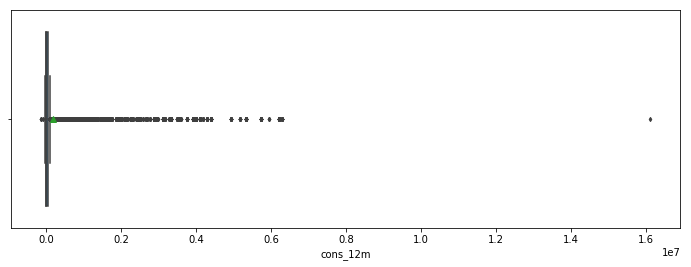

In [882]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'cons_12m', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


In [883]:
scipy.stats.mstats.winsorize(full['cons_12m'], limits=0.01,inplace=True)

masked_array(data=[309275,      2,  35446, ...,  11953,  39033,  15530],
             mask=False,
       fill_value=999999)

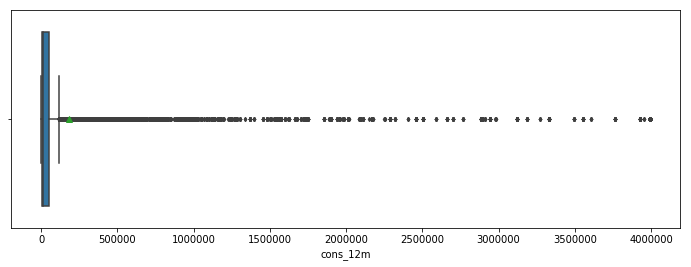

In [884]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'cons_12m', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


In [885]:
full.columns

Index(['id', 'campaign_disc_ele', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_first_activ',
       'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'isic_1l',
       'isic_2l', 'zip', 'churn', 'Churn_probability'],
      dtype='object')

In [886]:
print(len(full.cons_12m.unique()))
print(len(full.cons_gas_12m.unique()))

14198
2809


In [887]:
sum(full.has_gas=='t')# hay gente que tiene gas contratado y no se sabe el consumo de los últimos 12 meses
# generar variable con la gente que falta info
#generar variable que le de la mediana a estos

3692

In [888]:
sum(full.has_gas == 'f')

16407

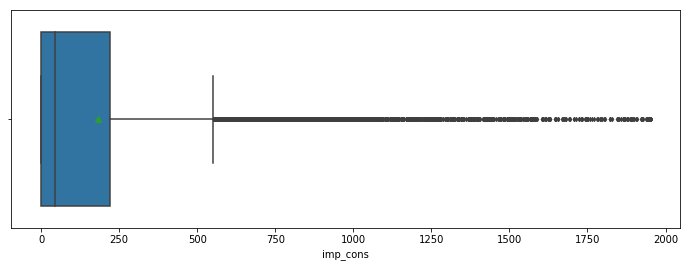

In [889]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'imp_cons', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()


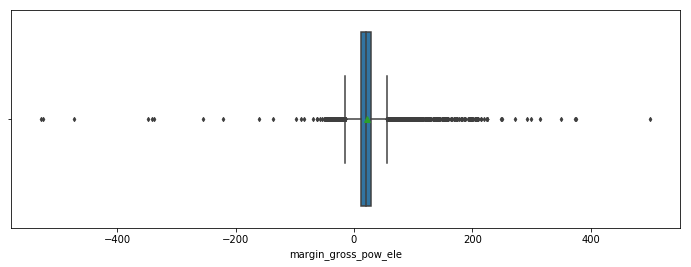

In [890]:
full.margin_gross_pow_ele
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'margin_gross_pow_ele', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()
#Crear variable binaria con los que son negativos

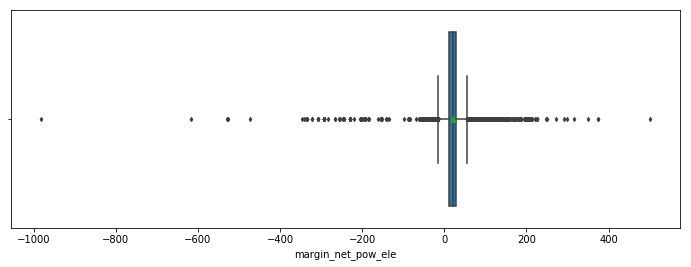

In [891]:
full.columns
full.margin_gross_pow_ele
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'margin_net_pow_ele', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()
#Crear variable binaria con los que son negativos

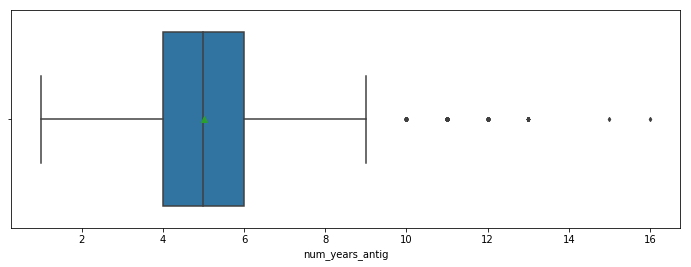

In [892]:
full.num_years_antig
full.margin_gross_pow_ele
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'num_years_antig', data =full, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()
#Crear variable binaria con los mayores de un percentil

In [893]:
#Crear variable con los dos primeros dígitos del zip
#Diferentes tasas de abandono dependiendo de la comunidad
full['state']=full.zip.apply(lambda x: str(x)[0:2])
full.state.value_counts().head()

15    2768
33    1922
28    1530
48    1490
32     776
Name: state, dtype: int64

In [894]:
full.columns

Index(['id', 'campaign_disc_ele', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_first_activ',
       'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele',
       'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'isic_1l',
       'isic_2l', 'zip', 'churn', 'Churn_probability', 'state'],
      dtype='object')

In [895]:
len(full.isic_2l.unique())

83

In [896]:
len(full.isic_1l.unique())

19

In [897]:
sorted(full.isic_1l.unique())

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S']

In [898]:
full.isic_2l.min()

1

In [899]:
train_david=pd.read_csv('train_carlos.csv')

In [901]:
features=pd.DataFrame(full['id'])

In [902]:
features['net_margin_w']=scipy.stats.mstats.winsorize(full['net_margin'], limits=0.01,inplace=True)

In [903]:
features['imp_cons_w']=scipy.stats.mstats.winsorize(full['imp_cons'], limits=0.01,inplace=True)

In [904]:
features['cons_12m_w']=scipy.stats.mstats.winsorize(full['cons_12m'], limits=0.01,inplace=True)

In [905]:
features['margin_gross_pow_ele_w']=scipy.stats.mstats.winsorize(full['margin_gross_pow_ele'], limits=0.01,inplace=True)


In [906]:
features['margin_net_pow_ele_w']=scipy.stats.mstats.winsorize(full['margin_net_pow_ele'], limits=0.01,inplace=True)


In [907]:
features['cons_12m_w']=scipy.stats.mstats.winsorize(full['cons_12m'], limits=0.01,inplace=True)

In [908]:
full.channel_sales.unique()

array(['lmkebamcaaclubfxadlmueccxoimlema',
       'foosdfpfkusacimwkcsosbicdxkicaua', nan,
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'usilxuppasemubllopkaafesmlibmsdf',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

## Label encoding and Target Encoding

In [910]:
df_te_sales = pd.DataFrame(train_david.groupby('channel_sales')['churn'].mean())
df_te_sales['te_channel_sales'] = df_te_sales['churn']
df_te_sales = df_te_sales.drop('churn', axis=1)

In [911]:
full = full.join(df_te_sales, how = 'left', on = 'channel_sales')

In [912]:
features['te_channel_sales'] = full['te_channel_sales']

In [913]:
################################
df_te_isic1= pd.DataFrame(train_david.groupby('isic_1l')['churn'].mean())
df_te_isic1['isic_1l_te'] = df_te_isic1['churn']
df_te_isic1 = df_te_isic1.drop('churn', axis=1)

In [914]:
full = full.join(df_te_isic1, how = 'left', on = 'isic_1l')

In [915]:
features['isic_1l_te'] = full['isic_1l_te']

In [916]:
##############

In [917]:
full['zip2']=full.zip.map(lambda x: "{:05}".format(x)[:2])

In [918]:
df_te_zip2= pd.DataFrame(train_david.groupby('zip2')['churn'].mean())
df_te_zip2['te_zip2'] = df_te_zip2['churn']
df_te_zip2 = df_te_zip2.drop('churn', axis=1)


In [919]:
full['zip2'] = full['zip2'].astype(int)

In [920]:
full = pd.merge(full, df_te_zip2, how = 'left', left_on='zip2', right_index=True)

In [921]:
features['zip2']=full.zip.map(lambda x: "{:05}".format(x)[:2])
features['te_zip2'] = full['te_zip2']

In [922]:

features.to_csv('featu_1')